In [1]:
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import numpy as np
import matplotlib
import matplotlib.animation as animation
from rasterio.warp import calculate_default_transform, reproject, Resampling
File = 'C:\\Users\\User\\Google Drive\\earthengine/NDVI_Time_Series.tif'
%matplotlib notebook


dst_crs = 'EPSG:32608'

with rio.open(File) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('FI_Projected.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rio.band(src, i),
                destination=rio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

Class
Degraded Polygons      66291.565641
Low Center Polygons    65279.332062
Open Water             65770.997458
Shub Tundra            64438.916799
Name: area, dtype: float64


<IPython.core.display.Javascript object>


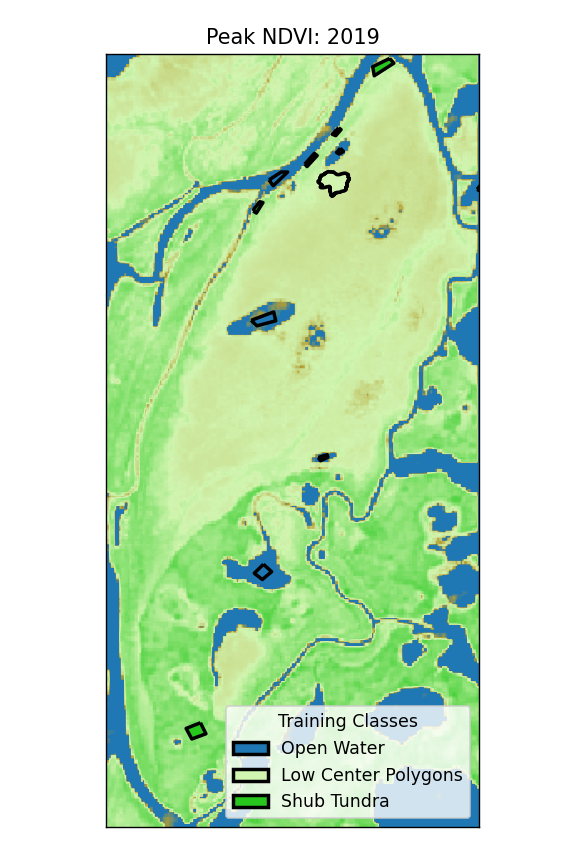

#1f78b4 Open Water
#d1f5b0 Low Center Polygons
#28c71e Shub Tundra
0
0
1
2
3


C:\Users\User\.conda\envs\geo-env\lib\site-packages\rasterio\plot.py:147: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(arr, **kwargs)


4
5
6
7
0
0
1


C:\Users\User\.conda\envs\geo-env\lib\site-packages\rasterio\plot.py:147: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(arr, **kwargs)


2
3
4
5
6
7
Done!


In [5]:
import geopandas as gpd

import matplotlib.patches as mpatches
Shapes = 'C:\\Users\\User\\Google Drive\\\Misc_Stuff/SiteInfo/Ninety/NintyPCT.shp'

Polys = gpd.read_file(Shapes)
Polys['area'] = Polys.area

# print(Polys)
shapes = ((geom,value) for geom,value in zip (Polys['geometry'],Polys['Code']))


Polys['Class']=Polys['Class'].replace({'Levee':'Shub Tundra',
                                       'Degraded':'Degraded Polygons',
                                       'Footprint':'Low Center Polygons',
                                       'Water':'Open Water'
                                      })

Polys.loc[Polys['Class']!='Degraded Polygons'].copy()
# Polys.plot()

print(Polys.groupby('Class').sum().area)

File = 'C:\\Users\\User\\Google Drive\\earthengine/NDVI_Series.tif'
File = 'FI_Projected.tif'

# fig,ax=plt.subplots()
with rio.open(File) as src:
    Im = src.read()
#     print(Im.shape)
    Im[Im<.2]=.2
    fig,ax = plt.subplots( figsize=(3.75,5.5) )
    fps = 1
    nSeconds = int(Im.shape[0]/2)
    a = Im[0]#snapshots[0]
    cmap = colors.LinearSegmentedColormap.from_list('custom', ['#1f78b4','#b59f33', '#d1f5b0','#28c71e'], N=256)
    bounds=[.25,Im.mean(), Im.max()]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    divnorm=colors.TwoSlopeNorm(vmin=.25, vcenter=Im.mean()-Im.std(), vmax=Im.std()*2.5+Im.mean())
    im = show(Im[0],transform=src.transform,ax=ax, vmin=Im.min(), vmax=Im.max(),cmap=cmap,norm = divnorm)
#     ax.scatter([504676],[7695881],marker='*',color='r',label='Study Site')

#     Polys.plot(ax=ax,facecolor='None',edgecolor='k',label='Sample Polygons',legend=True)


    CL = ['#1f78b4', '#d1f5b0','#28c71e']
    CL = ['#1f78b4', '#d1f5b0','#28c71e']
    # LL = ['DLP','LCP','LUA','OWA']
    LL = ['Open Water','Low Center Polygons','Shub Tundra']

    Combined_Patches=[]
    for c,l in zip(CL,LL):
        print(c,l)
        Polys.loc[Polys.Class==l].plot(ax=ax,facecolor=c,edgecolor='k',linewidth=2)
               
        kwargs = {'facecolor':c,
                 'edgecolor':'black',
                 'linewidth':2,
                 'label':l}
        Combined_Patches.append(mpatches.Patch(**kwargs))

        
    ax.legend(ncol=1,handles=(Combined_Patches), loc=4,title='Training Classes')

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Peak NDVI: '+str(2014))
    plt.tight_layout()
    def animate_func(i):
        print(i)
        ax.set_title('Peak NDVI: '+str(2014+i))
        show(Im[i],transform=src.transform,ax=ax, vmin=Im.min(), vmax=Im.max(),cmap=cmap,norm = divnorm) 
#         return #(im)

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = 8,
#                                    interval = 1000 / fps, # in ms
                                   )
    my_writer=animation.PillowWriter(fps=fps, codec='libx264', bitrate=2)
    anim.save(filename='C:\\Users\\User\\Google Drive\\FishIsland_NDVI2.gif', writer=my_writer)
    anim.save(filename='C:\\Users\\User\\GEOS270\\Module3\\docs\\content\\images/FishIsland_NDVI2.gif', writer=my_writer)
    print('Done!')

In [ ]:
# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.


fps = 3


with rio.open(File) as src:
    print(src.read())
# with rio.open('FI_Projected.tif') as src:
    Im = src.read()#[0:fps]
print(Im.shape)
nSeconds = int(Im.shape[0]/2)
# snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(4,4) )

a = Im[0]#snapshots[0]

cmap = colors.LinearSegmentedColormap.from_list('custom', ['blue','tan','green'], N=256)
bounds=[.25,Im.mean(), Im.max()]
norm = colors.BoundaryNorm(bounds, cmap.N)


divnorm=colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
# pcolormesh(your_data, cmap="coolwarm", norm=divnorm)

show(Im[0])#, vmin=Im.min(), vmax=Im.max(),cmap=cmap,norm = divnorm)
# im = plt.imshow(a, interpolation='none', aspect='auto', vmin=Im.min(), vmax=Im.max(),cmap=cmap)#,norm = divnorm)
# plt.colorbar(norm=divnorm)

def animate_func(i):
#     b = Im[i]
#     c = (a + b)/2
#     b = a.copy()
#     im.set_array(c)

    show(Im[i], vmin=Im.min(), vmax=Im.max(),cmap=cmap,norm = divnorm)
#     return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = fps,#nSeconds * fps,
#                                interval = 1000 / fps, # in ms
                               )
f = 'animationl.gif'

# cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#244162','#DCE6F1'], N=256)


my_writer=animation.PillowWriter(fps=fps, codec='libx264',)# bitrate=2)

anim.save(filename='C:\\Users\\User\\Google Drive\\FishIsland_NDVI.gif', writer=my_writer)

print('Done!')

# plt.show()  # Not required, it seems!


In [ ]:
import os
directory = 'C:\\Users\\User\\FishIsland_Processing\\Footprints/30min/'

L = []
for filename in os.listdir(directory):
#     if filename.endswith(".tif"): 
    L.append(int(filename.replace('_','').replace('.tif','')))
Im = np.asarray(L)
# # print(type(Im))
Im.sort()
Imz=[]
for i in Im:
    
    with rio.open(directory+str(i)[:8]+'_'+str(i)[8:]+'.tif') as src:
#         show(src.read(),transform=src.transform,ax=ax)
        Imz.append(src.read()[0])
Imz=np.asarray(Imz)

In [ ]:

# First set up the figure, the axis, and the plot element we want to animate
fig,ax = plt.subplots( figsize=(4,4) )
a = Imz[0]#snapshots[0]
# print(a.shape,snapshots[0].shape)


# cmap = colors.ListedColormap(['blue','white','green'],N=256)
# bounds=[.3,Imz.mean(), Imz.max()]
# norm = colors.BoundaryNorm(bounds, cmap.N)


cmap = colors.LinearSegmentedColormap.from_list('custom blue', ['blue','white','green'], N=256)
divnorm=colors.TwoSlopeNorm(vmin=0, vcenter=1e-6, vmax=.0001)
# pcolormesh(your_data, cmap="coolwarm", norm=divnorm)


im = ax.imshow(a, interpolation='none', aspect='auto', vmin=1e-5, vmax=Imz.max(),cmap=cmap,norm = divnorm)
# plt.gca()
# plt.colorbar(norm=divnorm)
plt.colorbar(im,ax=ax)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(Imz[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
#                                interval = 1000 / fps, # in ms
                               )
f = 'animationl.gif'

# cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#244162','#DCE6F1'], N=256)


my_writer=animation.PillowWriter(fps=fps, codec='libx264', bitrate=2)

anim.save(filename='gif_test.gif', writer=my_writer)

print('Done!')

# plt.show()  # Not required, it seems!
